In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [69]:
# mpl.rcParams['font.sans-serif'] = [u'simHei']
  mpl.rcParams['font.sans-serif'] = [u'simHei']
# mpl.rcParams['axes.unicode_minus']=False
  mpl.rcParams['axes.unicode_minus']=False
## 设置字符集，防止中文乱码
#


In [5]:
path = 'datas/crx.data'
names = ['A1','A2','A3','A4','A5','A6','A7','A8',
         'A9','A10','A11','A12','A13','A14','A15','A16']
df = pd.read_csv(path,header=None,names=names)
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [30]:
datas = df.replace('?',np.nan).dropna(how='any')
print ("原始数据数：%d 处理后的数据数：%d 异常数据数：%d" %(len(df), len(datas), len(df)-len(datas)))

原始数据数：690 处理后的数据数：653 异常数据数：37


In [18]:
# 类别信息转换成数值信息：哑编码 1-of-k
print(datas.A6.value_counts())

c     133
q      75
w      63
i      55
aa     52
ff     50
k      48
cc     40
m      38
x      36
d      26
e      24
j      10
r       3
Name: A6, dtype: int64


In [33]:
datas.head(73)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


In [15]:
# 哑编码实现
def parse(v,l):
    return [1 if i == v else 0 for i in l]

In [31]:
# 
def parseRecord(record):
    result = []
    a1 = record['A1']
    for i in parse(a1,('a','b')):
        result.append(i)
    
    result.append(float(record['A2']))
    result.append(float(record['A3']))
    
     # 将A4的信息转换为哑编码的形式; 对于DataFrame中，原来一列的数据现在需要四列来进行表示
    a4 = record['A4']
    for i in parse(a4, ('u', 'y', 'l', 't')):
        result.append(i)
        
    a5 = record['A5']
    for i in parse(a5,('g','p','gg')):
        result.append(i)
    
    a6 = record['A6']
    for i in parse(a6, ('c', 'd', 'cc', 'i', 'j', 'k', 'm', 'r', 'q', 'w', 'x', 'e', 'aa', 'ff')):
        result.append(i)
        
    a7 = record['A7']
    for i in parse(a7, ('v', 'h', 'bb', 'j', 'n', 'z', 'dd', 'ff', 'o')):
        result.append(i)

    result.append(float(record['A8']))

    a9 = record['A9']
    for i in parse(a9, ('t', 'f')):
        result.append(i)

    a10 = record['A10']
    for i in parse(a10, ('t', 'f')):
        result.append(i)

    result.append(float(record['A11']))

    a12 = record['A12']
    for i in parse(a12, ('t', 'f')):
        result.append(i)

    a13 = record['A13']
    for i in parse(a13, ('g', 'p', 's')):
        result.append(i)

    result.append(float(record['A14']))
    result.append(float(record['A15']))

    a16 = record['A16']
    if a16 == '+':
        # 信贷审批通过
        result.append(1)
    else:
        # 信贷审批不通过
        result.append(0)
    
    return result
    

In [21]:
# 哑编码测试
print(parse('v', ['v', 'y', 'l']))
print(parse('y', ['v', 'y', 'l']))
print(parse('l', ['v', 'y', 'l']))

[1, 0, 0]
[0, 1, 0]
[0, 0, 1]


In [22]:
### 数据特征处理(将数据转换为数值类型的)
new_names =  ['A1_0', 'A1_1',
              'A2','A3',
              'A4_0','A4_1','A4_2','A4_3', # 因为需要对A4进行哑编码操作，需要使用四列来表示一列的值
              'A5_0', 'A5_1', 'A5_2',
              'A6_0', 'A6_1', 'A6_2', 'A6_3', 'A6_4', 'A6_5', 'A6_6', 'A6_7', 'A6_8', 'A6_9', 'A6_10', 'A6_11', 'A6_12', 'A6_13',
              'A7_0', 'A7_1', 'A7_2', 'A7_3', 'A7_4', 'A7_5', 'A7_6', 'A7_7', 'A7_8',
              'A8',
              'A9_0', 'A9_1' ,
              'A10_0', 'A10_1',
              'A11',
              'A12_0', 'A12_1',
              'A13_0', 'A13_1', 'A13_2',
              'A14','A15','A16']

In [34]:
# datas = df.apply(lambda x: pd.Series(parseRecord(x),index = new_names), axis=1)
# datas.head()
datas = datas.apply(lambda x: pd.Series(parseRecord(x), index = new_names), axis=1)
names = new_names

In [35]:
datas.head()

,A1_0,A1_1,A2,A3,A4_0,A4_1,A4_2,A4_3,A5_0,A5_1,...,A10_1,A11,A12_0,A12_1,A13_0,A13_1,A13_2,A14,A15,A16
0,0.0,1.0,30.83,0.000,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,202.0,0.0,1.0
1,1.0,0.0,58.67,4.460,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,6.0,0.0,1.0,1.0,0.0,0.0,43.0,560.0,1.0
2,1.0,0.0,24.50,0.500,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,280.0,824.0,1.0
3,0.0,1.0,27.83,1.540,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,5.0,1.0,0.0,1.0,0.0,0.0,100.0,3.0,1.0
4,0.0,1.0,20.17,5.625,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,120.0,0.0,1.0


In [54]:
X = datas[names[0:-1]]
Y = datas[names[-1]]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=0)

In [55]:
print(X_train.describe().T)

       count        mean          std    min     25%     50%      75%  \
A1_0   587.0    0.315162     0.464977   0.00   0.000    0.00    1.000   
A1_1   587.0    0.684838     0.464977   0.00   0.000    1.00    1.000   
A2     587.0   31.685417    11.883506  13.75  22.625   28.67   38.290   
A3     587.0    4.909319     5.073588   0.00   1.040    3.00    7.520   
A4_0   587.0    0.761499     0.426530   0.00   1.000    1.00    1.000   
A4_1   587.0    0.235094     0.424419   0.00   0.000    0.00    0.000   
A4_2   587.0    0.003407     0.058321   0.00   0.000    0.00    0.000   
A4_3   587.0    0.000000     0.000000   0.00   0.000    0.00    0.000   
A5_0   587.0    0.761499     0.426530   0.00   1.000    1.00    1.000   
A5_1   587.0    0.235094     0.424419   0.00   0.000    0.00    0.000   
A5_2   587.0    0.003407     0.058321   0.00   0.000    0.00    0.000   
A6_0   587.0    0.211244     0.408539   0.00   0.000    0.00    0.000   
A6_1   587.0    0.037479     0.190094   0.00   0.00

In [56]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [45]:
names[0:-2]
print(pd.DataFrame(X_train,columns=names[0:-1]).describe().T)

       count          mean       std       min       25%       50%       75%  \
A1_0   587.0 -5.636226e-17  1.000853 -0.678380 -0.678380 -0.678380  1.474101   
A1_1   587.0  5.636226e-17  1.000853 -1.474101 -1.474101  0.678380  0.678380   
A2     587.0  6.639588e-16  1.000853 -1.510557 -0.763087 -0.253965  0.556251   
A3     587.0  2.175054e-16  1.000853 -0.968448 -0.763290 -0.376646  0.515002   
A4_0   587.0  3.782702e-17  1.000853 -1.786857  0.559642  0.559642  0.559642   
A4_1   587.0  1.059157e-17  1.000853 -0.554391 -0.554391 -0.554391 -0.554391   
A4_2   587.0  2.240069e-16  1.000853 -0.058471 -0.058471 -0.058471 -0.058471   
A4_3   587.0  0.000000e+00  0.000000  0.000000  0.000000  0.000000  0.000000   
A5_0   587.0  3.782702e-17  1.000853 -1.786857  0.559642  0.559642  0.559642   
A5_1   587.0  1.059157e-17  1.000853 -0.554391 -0.554391 -0.554391 -0.554391   
A5_2   587.0  2.240069e-16  1.000853 -0.058471 -0.058471 -0.058471 -0.058471   
A6_0   587.0  1.588735e-16  1.000853 -0.

In [49]:
## Logistic算法模型构建
# LogisticRegression中，参数说明：
# 1、penalty：惩罚项方式，即使用何种方式进行正则化操作(可选: l1或者l2)
# 2、C ：惩罚项系数，即L1或者L2正则化项中给定的那个λ系数(课件图片上)
# LogisticRegressionCV中，参数说明：
# 1、LogisticRegressionCV表示LogisticRegression进行交叉验证选择超参（机器学习调参）(惩罚项系数C或者λ)
# 2、Cs ：表示在交叉验证中惩罚项系数λ的可选范围

lr = LogisticRegressionCV(Cs=np.logspace(-4,1,50), fit_intercept=True,penalty='l2',solver='lbfgs',tol=0.01,multi_class='ovr')

In [57]:
lr.fit(X_train,Y_train)

LogisticRegressionCV(Cs=array([  1.00000e-04,   1.26486e-04,   1.59986e-04,   2.02359e-04,
         2.55955e-04,   3.23746e-04,   4.09492e-04,   5.17947e-04,
         6.55129e-04,   8.28643e-04,   1.04811e-03,   1.32571e-03,
         1.67683e-03,   2.12095e-03,   2.68270e-03,   3.39322e-03,
         4.29193e-03,   5.428...     3.08884e+00,   3.90694e+00,   4.94171e+00,   6.25055e+00,
         7.90604e+00,   1.00000e+01]),
           class_weight=None, cv=None, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=100, multi_class='ovr',
           n_jobs=1, penalty='l2', random_state=None, refit=True,
           scoring=None, solver='lbfgs', tol=0.01, verbose=0)

In [58]:
## Logistic算法效果输出
lr_r = lr.score(X_train, Y_train)
lr_r_test = lr.score(X_test, Y_test)
print ("Logistic算法R值（训练集上的准确率）：", lr_r)
print ("Logistic算法R值（测试集上的准确率）：", lr_r_test)
# 训练集上的准确率R^2值再高也只能一定程度上体现模型训练得还可以，但是是否存在过拟合问题与实际效果到底如何，需要在测试集上看准确率判断的

Logistic算法R值（训练集上的准确率）： 0.890971039182
Logistic算法R值（测试集上的准确率）： 0.863636363636


In [59]:
print ("Logistic算法稀疏化特征比率：%.2f%%" % (np.mean(lr.coef_.ravel() == 0) * 100))
print ("Logistic算法参数：",lr.coef_)
print ("Logistic算法截距：",lr.intercept_)

## Logistic算法预测（预测所属类别）
lr_y_predict = lr.predict(X_test)
print('预测所属的类别：', lr_y_predict)

## Logistic算法获取概率值(就是Logistic算法计算出来的结果值)
print(lr.predict_proba(X_test))

Logistic算法稀疏化特征比率：2.13%
Logistic算法参数： [[-0.00507672  0.00507672  0.06367298  0.06284643  0.03997945 -0.04935683
   0.06679464  0.          0.03997945 -0.04935683  0.06679464  0.00549457
  -0.02646873  0.1057865  -0.10294239 -0.02346199 -0.05981958 -0.0131902
   0.01148842  0.04690591  0.03631018  0.13996153  0.03858644 -0.02422956
  -0.11817039 -0.00441403  0.08130739 -0.02489682  0.03130081  0.03567533
  -0.01396069 -0.00769375 -0.10417126 -0.00379776  0.15834772  0.46892613
  -0.46892613  0.16546747 -0.16546747  0.19117654 -0.01273762  0.01273762
   0.01240825 -0.00744574 -0.0110668  -0.08907636  0.12989149]]
Logistic算法截距： [-0.25992008]
预测所属的类别： [ 1.  1.  1.  0.  1.  1.  0.  1.  0.  1.  1.  0.  0.  1.  1.  0.  1.  0.
  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  1.  0.  0.  1.  0.
  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  1.  0.  0.  1.  1.  0.  1.  0.
  0.  1.  0.  1.  1.  1.  0.  1.  0.  1.  0.  1.]
[[ 0.22855228  0.77144772]
 [ 0.18260146  0.81739854]
 [ 0.15724948  0.8427

In [62]:
# KNN 算法
knn = KNeighborsClassifier(n_neighbors=20, algorithm='kd_tree',weights='distance')
knn.fit(X_train,Y_train)

In [67]:
knn_r = knn.score(X_train,Y_train)
print("KNN算法训练上R^2值（准确率）：%.2f" % knn_r)
knn_y_predict = knn.predict(X_test)
knn_r_test = knn.score(X_test,Y_test)
print("KNN算法R^2值（测试集上准确率）：%.2f" % knn_r_test)

KNN算法训练上R^2值（准确率）：1.00
KNN算法R^2值（测试集上准确率）：0.83


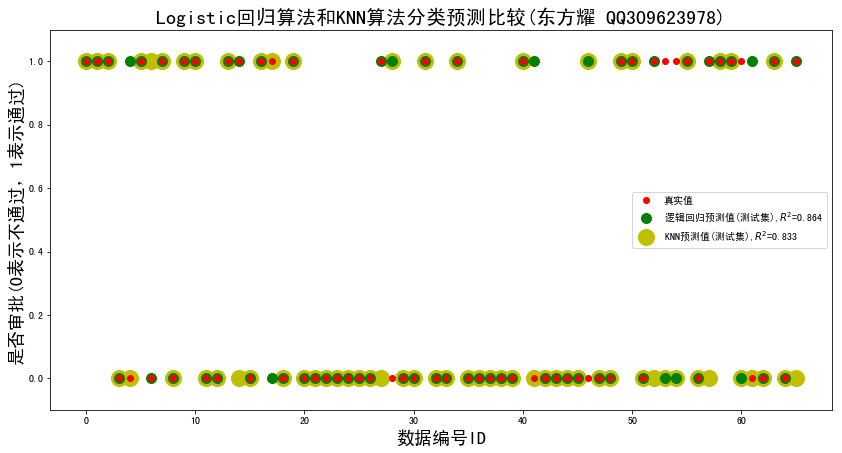

In [70]:
## 结果图像展示
## c. 图表展示
x_len = range(len(X_test))
plt.figure(figsize=(14,7), facecolor='w')
plt.ylim(-0.1,1.1)
plt.plot(x_len, Y_test, 'ro',markersize = 6, zorder=3, label=u'真实值')
plt.plot(x_len, lr_y_predict, 'go', markersize = 10, zorder=2, label=u'逻辑回归预测值(测试集),$R^2$=%.3f' % lr.score(X_test, Y_test))
plt.plot(x_len, knn_y_predict, 'yo', markersize = 16, zorder=1, label=u'KNN预测值(测试集),$R^2$=%.3f' % knn.score(X_test, Y_test))
plt.legend(loc = 'center right')
plt.xlabel(u'数据编号ID', fontsize=18)
plt.ylabel(u'是否审批(0表示不通过，1表示通过)', fontsize=18)
plt.title(u'Logistic回归算法和KNN算法分类预测比较(东方耀 QQ309623978)', fontsize=20)
plt.show()